# **Lab 12: Exoplanets**



In [329]:
from pylab import *
import pandas as pd

In [330]:
# Read in data from the csv
data = pd.read_csv('exoplanets.csv')
data



,Planet,Orbital Period,Planet Radius,Planet Mass
0,b,1.5109,1.086,0.790
1,c,2.4218,1.056,1.630
2,d,4.0498,0.772,0.330
3,e,6.0996,0.918,0.240
4,f,9.2065,1.045,0.360
5,g,12.3528,1.127,0.566
6,H,18.7663,0.715,0.086


In [331]:
# constants for general use and conversion (all in mks)
earthRadius = 6371 # in km
au = 1.5*10**8 # in km
massEarth = 5.972*10**24 # in kg
G = 6.67408e-11 # m^3 kg^-1 s^-2
massSun = 1.989*10**30 # in kg

# make vectors for each field
planets = array(data['Planet']) 
orbitalPeriods = array(data['Orbital Period']) # days
orbitalPeriodsYears =  orbitalPeriods / 365.25 # years
planetRadius = array(data['Planet Radius']) # R_\oplus
planetMass = array(data['Planet Mass']) # M_\oplus

Note that Planet radius and Planet mass are in terms of $R_\oplus = 6371\;km$, $M_\oplus = 5.972\times 10^{24}\;kg$ respectively

In [332]:
# turn into mks units
planetRadiusKm = planetRadius * 6371 # in km
planetRadiusKm

array([6918.906, 6727.776, 4918.412, 5848.578, 6657.695, 7180.117,
       4555.265])

In [333]:
planetMassKg = planetMass * massEarth # in kg
planetMassKg

array([4.717880e+24, 9.734360e+24, 1.970760e+24, 1.433280e+24,
       2.149920e+24, 3.380152e+24, 5.135920e+23])

## Part a:

In [334]:
# Kepler's third law
# returns the semi-major axis length 'a' of ea planet's orbit in AU
def keplerThirdLaw(P):
    return (P**(2/3))

a = keplerThirdLaw(orbitalPeriodsYears) # in AU
a

array([0.02576897, 0.03529382, 0.04972356, 0.06533423, 0.08596788,
       0.10458036, 0.13820559])

## Part b:

In [335]:
for i, item in enumerate(a):
    print(f'Planet {planets[i]}: semi-major axis = {item:.3} AU = {item * au:.3} km')


Planet b: semi-major axis = 0.0258 AU = 3.87e+06 km
Planet c: semi-major axis = 0.0353 AU = 5.29e+06 km
Planet d: semi-major axis = 0.0497 AU = 7.46e+06 km
Planet e: semi-major axis = 0.0653 AU = 9.8e+06 km
Planet f: semi-major axis = 0.086 AU = 1.29e+07 km
Planet g: semi-major axis = 0.105 AU = 1.57e+07 km
Planet H: semi-major axis = 0.138 AU = 2.07e+07 km


## Part c:

In [336]:
def drawOrbit(x0: int, y0: int, r: float, numPoints = 100) -> (float, float):
    theta = linspace(0, 2*pi , numPoints)
    x = r * cos(theta) + x0
    y = r * sin(theta) + y0
    return x, y

## Part d & e:

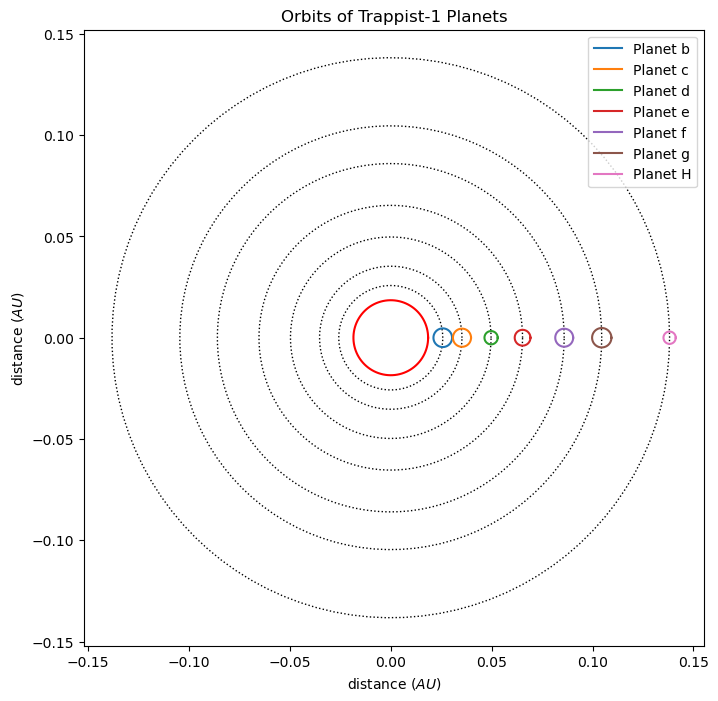

In [337]:

fig = figure(figsize=(8, 8))
ax = fig.add_subplot(111)
# rcParams['lines.markersize'] = 1

# plot information
title("Orbits of Trappist-1 Planets")
xlabel('distance ($AU$)')
ylabel('distance ($AU$)')

# plot the orbit for each planet
for distance in a:
    x, y = drawOrbit(0, 0, distance)
    plot(x, y, linestyle='dotted', linewidth=1, color='k')

# convert star radius from earth radii to AU and scale by 35
starRadius = (12.45 * earthRadius / au) * 35
x, y = drawOrbit(0, 0, starRadius)
plot(x, y, 'r-')
autoscale(axis='y')

# convert planet radius from km to AU and scale by 100
l = (planetRadiusKm / au) * 100

# draw a circle to represent planet in each orbit
for idx, distance in enumerate(a):
    x, y = drawOrbit(distance, 0, l[idx])
    plot(x, y, '-', label=f'Planet {planets[idx]}')

legend()

## Part f & g:

In [338]:
##########  Data Table  ##############################################
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
######################################################################

In [339]:
# turn star mass into kg
massStar = 0.08 * massSun # solar mass is a ratio of the sun's mass

# turn a from AU to m for orbital energy calculations
a_m = a * au * 1e3

# turn AU into m for orbital energy calculations
au_m = au * 1e3

# compute total orbital energy and express in Earth Units
def totalOrbitalEnergy(a, planetMass):
    energy = -G * massStar * planetMass / (2 * a)
    energyEarthSun = -G * massSun * massEarth / (2 * au_m)
    earthUnits = energy / energyEarthSun # in Earth Units i.e. ratio of energy of trappist-1 planets to earth-sun energy 
    return earthUnits

# vector for total orbital energy
totalEnergy = array([totalOrbitalEnergy(a_m[i], planetMassKg[i]) for i in range(len(a))])

table = ListTable()
table.append(['Planet','Orbital Period [days]','Planet Radius [Earth Radii]','Planet Mass [Earth Masses]','Semi-major Axis Length [a]', 'Total Orbital Energy [E]'])
for item in range(len(a)):
    table.append([f'{planets[item]}',f'{orbitalPeriods[item]:.4f}',f'{planetRadius[item]:.3f}',f'{planetMass[item]:.3}',f'{a[item]:.3f}', f'{totalEnergy[item]:.3f}'])
table
    

Planet,Orbital Period [days],Planet Radius [Earth Radii],Planet Mass [Earth Masses],Semi-major Axis Length [a],Total Orbital Energy [E]
b,1.5109,1.086,0.79,0.026,2.453
c,2.4218,1.056,1.63,0.035,3.695
d,4.0498,0.772,0.33,0.050,0.531
e,6.0996,0.918,0.24,0.065,0.294
f,9.2065,1.045,0.36,0.086,0.335
g,12.3528,1.127,0.566,0.105,0.433
H,18.7663,0.715,0.086,0.138,0.050


## Part h:

Planet b: semi-major axis = 0.0258 AU | Energy = 2.45 Earth Units
Planet c: semi-major axis = 0.0353 AU | Energy = 3.69 Earth Units
Planet d: semi-major axis = 0.0497 AU | Energy = 0.531 Earth Units
Planet e: semi-major axis = 0.0653 AU | Energy = 0.294 Earth Units
Planet f: semi-major axis = 0.086 AU | Energy = 0.335 Earth Units
Planet g: semi-major axis = 0.105 AU | Energy = 0.433 Earth Units
Planet H: semi-major axis = 0.138 AU | Energy = 0.0498 Earth Units


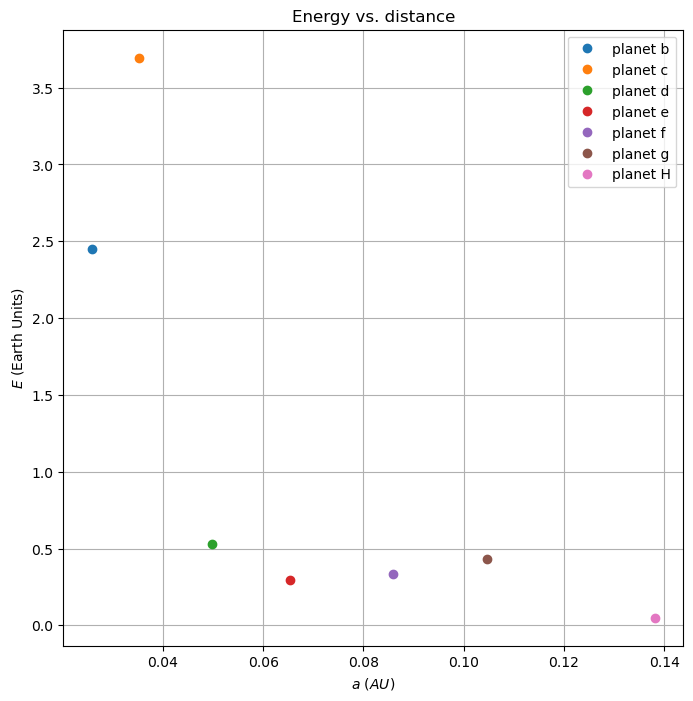

In [340]:
fig = figure(figsize=(8,8))
ax = fig.add_subplot(111)

# plot information
title('Energy vs. distance')
xlabel('$a$ ($AU$)')
ylabel('$E$ (Earth Units)')
for idx, planet in enumerate(planets):
    print(f'Planet {planet}: semi-major axis = {a[idx]:.3} AU | Energy = {totalEnergy[idx]:.3} Earth Units')
    plot (a[idx], totalEnergy[idx], 'o', label=f'planet {planet}')

legend()
grid()
autoscale()